# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Tress are constructed through a repeating process of splitting data. An algorithm selects the best feature and threshold/category (depending on the type of variables) and splits the data into two groups to create children. This is repeated and parents are split into children until a stopping condition is met, such as a minimum number of samples or number of children.

2. Trees handle non-linear relationships betweeen variables because they split the data based on features and thresholds. The data is split into regions allowing for more complex non-linear decision boundaries, whereas linear model produce straight-line decision boundaries. Different rules can be applied depending on which side of the threshold the data falls on.

3. Gini measures the likelihood of incorrectly classifying an element. It is a good because it penalizes impure nodes so that splits that create "pure" leaves are encouraged which usually creates better performance of the model.

4. Trees tend to overfit because they work almost too effectively on training data. When new data is introduced, models have a hard time adapting to generalize it because it is used to splitting every leaf in training data. To address this tendency, we can set a maximum depth so that the model is forced to stop splitting or a minimum number of samples per leaf so that a data groups do not become too small.

5. This statement is false. Trees do perform well with categorical variables but also perform with numeric features. Trees split numeric values at set thresholds which allow them to model incoming new data after training.

6. Usually more than two branches are not used in trees because a binary split is best for balance and interpretation of the tree, efficiency for optimization algorithms, and is usually just easier to understand and implement.


7. To identify overfitting, some signs are: a tree that is too deep with small branches, leaves with only 1 or 2 data points, poor test performance.
Some signs of underfitting are a small number of split levels, poor accuracy on both training and test sets, and expected patterns in the data are not visualized.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [1]:
# set up loading data
!rm -rf trees
! git clone https://github.com/quentinshin34/trees.git

Cloning into 'trees'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 119 (delta 14), reused 5 (delta 5), pack-reused 102 (from 1)
Receiving objects: 100% (119/119), 74.45 MiB | 19.80 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load data into data frame
data = "trees/assignment/data/Breast Cancer METABRIC.csv"
df = pd.read_csv(data)
print(f"Observations: {df.shape[0]}, Variables: {df.shape[1]}")

print(df.head())

Observations: 2509, Variables: 34
  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
0                 clau

In [7]:
## 2
# select and organize features
numeric_features = df[['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']]
categorical_features = df[['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']]

# One-hot encode categorical features + matrix
categorical_encoded = pd.get_dummies(categorical_features, drop_first=True)
X = pd.concat([numeric_features, categorical_encoded], axis=1)

y_class = df['Overall Survival Status'] # classification

mask = y_class.notna() # clean data
X = X[mask]
y_class = y_class[mask]


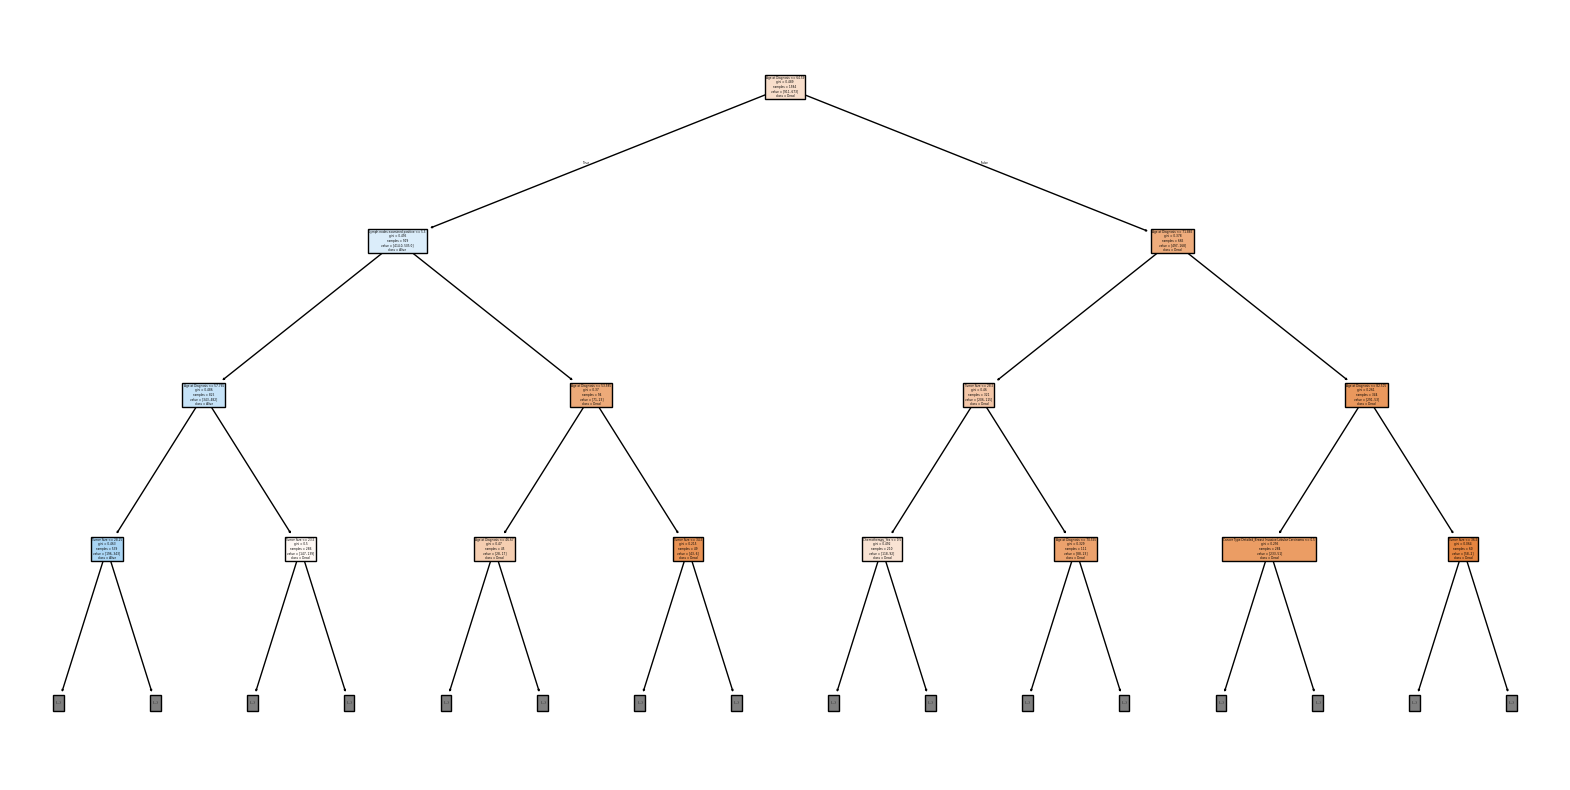

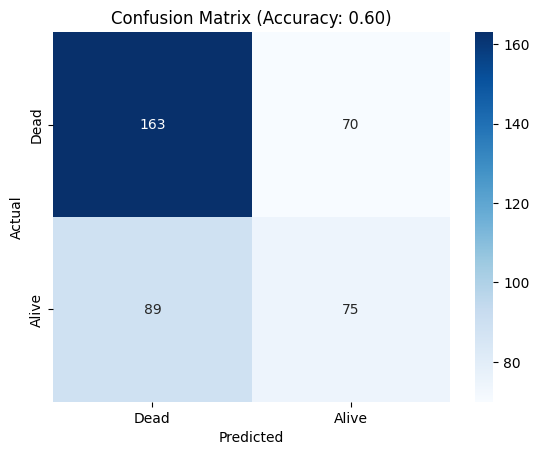

Accuracy: 0.60


In [8]:
# split for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train model with n = 10
clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)

# dendrogram and confusino matrix plot
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Dead', 'Alive'], filled=True, max_depth=3)
plt.show()

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dead', 'Alive'], yticklabels=['Dead', 'Alive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Accuracy: {acc:.2f})")
plt.show()

print(f"Accuracy: {acc:.2f}")


In [9]:
# confusion matrix breakdown
tn, fp, fn, tp = cm.ravel()
# calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivity (TPR): {sensitivity:.2f}")
print(f"Specificity (TNR): {specificity:.2f}")



Sensitivity (TPR): 0.46
Specificity (TNR): 0.70
The model is better at identifying patients who did not survive.


Best min_samples_leaf: 125, Best R²: 0.13


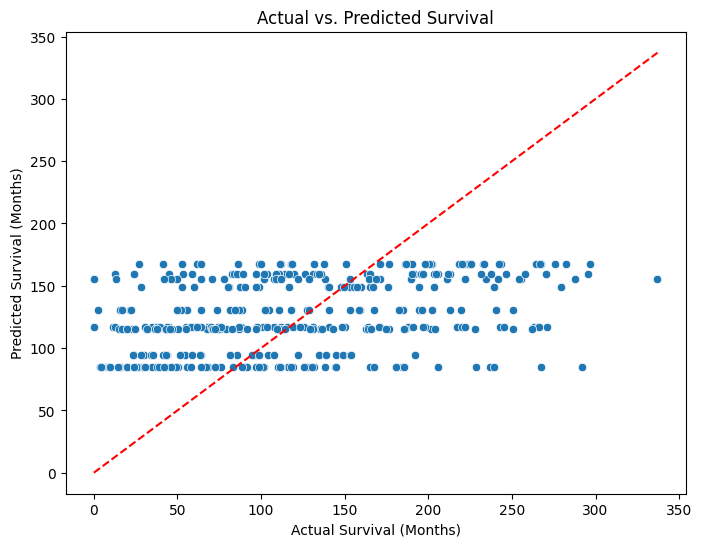

In [11]:
## 5
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

y_reg = df['Overall Survival (Months)'][mask]

# search for best min_samples_leaf
best_r2 = -1
best_leaf = None

for leaf in range(5, 151, 5):
    X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
    reg = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    reg.fit(X_train, y_train)
    preds = reg.predict(X_test)
    r2 = r2_score(y_test, preds)
    if r2 > best_r2:
        best_r2 = r2
        best_leaf = leaf

print(f"Best min_samples_leaf: {best_leaf}, Best R²: {best_r2:.2f}")

# refit using best leaf found
reg = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
reg.fit(X_train, y_train)
preds = reg.predict(X_test)
# plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=preds)
plt.xlabel('Actual Survival (Months)')
plt.ylabel('Predicted Survival (Months)')
plt.title('Actual vs. Predicted Survival')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()



**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?